In [96]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
import math

In [ ]:
#Generate Data
X = np.concatenate([np.random.normal(-1.5, 1.2, 50),
np.random.normal(3, 0.7, 100),
np.random.normal(6, 1, 150)])

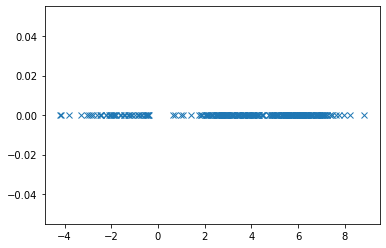

In [9]:
#Plot Data
plt.plot(X, np.zeros_like(X), 'x')
plt.show()

In [155]:
#function to calculate euklidean distance between two vectors
def ed(x,y):
    temp=0
    for i in range(len (x)):
        temp+=(x[i]-y[i])**2
    return temp
#Define Function E_step
#Input: - vectors with 3 values: pi, mu, sigma
#       - training data matrix X
#returns matrix of ro_i_n's
def EStep(X,pi, mu, sigma):
    #Initalize Ro
    ro=np.zeros((len(pi),len(X)))
    #Compute Ro
    for i,rowi in enumerate(ro):
        for j,rowj in enumerate(rowi):
            ro[i][j]=(pi[i]*norm.pdf(X[j], loc=mu[i], scale=sigma[i]))/sum([pi[l]*norm.pdf(X[j], loc=mu[l], scale=sigma[l]) for l in range(len(pi))])
    return ro

#Define Funtion M-step
#Description calculates updated PI's mu's and sigma's
#input: - 3xn matrix: ro
#       - vector with 3 Values: pi,mu, sigma
#       - Training Data Matrix: X
def MStep(X,ro,pi,mu,sigma):
    mu_new=[np.dot(X,ro[i])/sum(ro[i]) for i in range(len(pi))]
    sigma_new= [np.dot((X-mu[i])**2,ro[i])/sum(ro[i]) for i in range(len(pi))]
    pi_new = [sum(ro[i])/len(X) for i in range(len(pi))]
    return pi_new,mu_new,sigma_new

# Define Function EM Alorithm
#Input: Number of Clusters k, Dataset X
#Output: Model Parameters Pi, Mu, Sigma
def EMAlgo(k,X):
    #Initialize Parameters
    a=[random.random() for i in range(3)]
    s= sum(a)
    pi=[i/s for i in a]
    mu=[X[random.randint(0,len(X))] for i in range(k)]
    sigma=np.ones(k)
    pi_old=sigma_old=mu_old=np.zeros(k)
    
    #Do until convergence
    while(ed(pi,pi_old)>0.1 or ed(mu,mu_old)>0.1 or ed(sigma,sigma_old)>0.1):
        #save old values
        pi_old,mu_old,sigma_old = pi, mu , sigma
        #E-Step
        ro=EStep(X,pi,mu,sigma)
        print(ro)   
        #M-Step
        
        pi, mu, sigma = MStep(X,ro,pi,mu,sigma)
    return pi, mu,sigma

In [156]:
#Apply Model
pi ,mu, sigma=EMAlgo(3,X)
#Report Results
print("pi values:", pi)
print("mu values:",mu)
print("variance values:",sigma)

[[7.72412322e-02 1.56236485e-02 3.31193143e-02 1.29208787e-01
  1.95791423e-02 8.88668540e-03 2.90677736e-02 1.27680426e-01
  2.08979427e-01 6.16998715e-01 1.06027835e-02 5.94430472e-02
  3.55535731e-02 7.48353803e-02 1.55432447e-01 2.50129880e-01
  9.64986117e-03 6.57667486e-02 2.69624880e-02 9.27266125e-03
  9.85535105e-02 9.12493520e-03 1.86418464e-01 1.65767922e-02
  1.87084671e-03 6.40406316e-02 9.58389931e-02 6.04273878e-01
  3.63440584e-02 4.54405839e-04 5.75095320e-02 1.02388351e-02
  2.22522901e-01 1.32755576e-02 2.27888231e-02 1.32516971e-01
  4.85696407e-01 4.47614802e-02 6.57588983e-02 8.57505233e-03
  3.24352809e-01 2.76747594e-02 1.04979457e-02 2.38143014e-02
  2.03641762e-03 7.38481868e-02 1.62514002e-02 4.29703765e-02
  1.29902166e-02 8.36852625e-02 7.85375552e-08 9.20474378e-05
  2.63465720e-06 1.35261129e-04 3.66116523e-05 1.69327118e-04
  8.52604327e-05 1.00329996e-05 2.04224125e-08 8.14389026e-05
  2.59023656e-04 1.13182411e-03 3.69385559e-07 3.38350740e-05
  3.2345

[[9.84895343e-02 3.04017342e-02 5.83842164e-02 1.21437877e-01
  3.76880627e-02 1.65532342e-02 5.28023050e-02 1.20964112e-01
  1.36709870e-01 1.11474531e-01 2.02399290e-02 8.57941466e-02
  6.15232586e-02 9.69697206e-02 1.28281548e-01 1.39824165e-01
  1.82038862e-02 9.07146314e-02 4.97102778e-02 1.73900906e-02
  1.09879691e-01 1.70702698e-02 1.33887778e-01 3.22153270e-02
  1.84222022e-03 8.94207100e-02 1.08610807e-01 1.13599855e-01
  6.25103046e-02 1.32063885e-04 8.41857129e-02 1.94658363e-02
  1.37995147e-01 2.57747603e-02 4.31528347e-02 1.22432216e-01
  1.29792767e-01 7.21388969e-02 9.07088264e-02 1.58747953e-02
  1.40739247e-01 5.07718328e-02 2.00174105e-02 4.48193346e-02
  2.11629547e-03 9.63300838e-02 3.16003718e-02 7.02161449e-02
  2.51971584e-02 1.02304669e-01 1.01815570e-07 3.94472511e-06
  4.15847783e-07 8.77925772e-06 1.45666654e-06 1.47965854e-05
  3.46825851e-06 7.30970465e-07 5.87427976e-08 3.22915222e-06
  3.92417199e-05 7.74334086e-04 1.89620358e-07 1.38172070e-06
  6.4105

[[9.34193921e-02 5.35940337e-02 7.59170733e-02 9.59048028e-02
  6.04841599e-02 3.72075534e-02 7.22606390e-02 9.59364152e-02
  9.06146578e-02 4.31288344e-02 4.21142871e-02 8.94784967e-02
  7.78301420e-02 9.30295824e-02 9.48196512e-02 8.64635028e-02
  3.94651858e-02 9.11867787e-02 7.00865350e-02 3.83652309e-02
  9.55427281e-02 3.79260642e-02 9.26125601e-02 5.53980878e-02
  8.46693881e-03 9.07591937e-02 9.53817457e-02 4.46604490e-02
  7.84112593e-02 1.21292486e-03 8.88721184e-02 4.11236847e-02
  8.93073932e-02 4.86827658e-02 6.50916952e-02 9.58225688e-02
  5.89190536e-02 8.35898189e-02 9.11848952e-02 3.62481538e-02
  7.81284027e-02 7.08454033e-02 4.18315374e-02 6.64132657e-02
  9.34306152e-03 9.28585977e-02 5.47934468e-02 8.26251094e-02
  4.80354438e-02 9.42927325e-02 4.33967726e-06 8.01365608e-05
  1.34322477e-05 1.50139349e-04 3.64624832e-05 2.25606096e-04
  7.24081587e-05 2.10728900e-05 2.78407595e-06 6.84427882e-05
  4.80031193e-04 4.52991244e-03 7.15770352e-06 3.49658717e-05
  6.9964

[[9.85046109e-02 6.07014466e-02 8.78259083e-02 8.92353943e-02
  6.96525499e-02 3.88466654e-02 8.38684620e-02 8.95878669e-02
  7.02332723e-02 1.24311208e-02 4.53857833e-02 9.84336327e-02
  8.97713284e-02 9.86660861e-02 8.29845992e-02 6.11668675e-02
  4.18476094e-02 9.88370533e-02 8.13911157e-02 4.03834253e-02
  9.56651699e-02 3.97998949e-02 7.55147893e-02 6.30734560e-02
  5.20772349e-03 9.87760434e-02 9.61340242e-02 1.33774259e-02
  9.03425028e-02 3.16156726e-04 9.82017871e-02 4.40611538e-02
  6.71618353e-02 5.41775234e-02 7.54229437e-02 8.84658995e-02
  2.43261438e-02 9.49258009e-02 9.88368521e-02 3.75770140e-02
  4.69195477e-02 8.22651971e-02 4.50075414e-02 7.70349973e-02
  5.98229833e-03 9.87197462e-02 6.22803138e-02 9.41517360e-02
  5.33126811e-02 9.78830254e-02 6.79543201e-08 5.59292993e-06
  3.78048682e-07 1.43227155e-05 1.71059912e-06 2.62989346e-05
  4.80302639e-06 7.47463356e-07 3.45537696e-08 4.41340874e-06
  8.07140468e-05 2.13866195e-03 1.45457342e-07 1.60583235e-06
  1.4081

[[1.36705169e-01 6.07931488e-02 1.29583155e-01 8.98891454e-02
  8.21646348e-02 2.14059091e-02 1.19375041e-01 9.11991778e-02
  3.93582677e-02 1.87632460e-04 3.10374024e-02 1.47114943e-01
  1.34370185e-01 1.38553553e-01 6.93958260e-02 2.49483058e-02
  2.55875617e-02 1.44445968e-01 1.12826961e-01 2.34965927e-02
  1.17802240e-01 2.26901867e-02 5.02093388e-02 6.62127335e-02
  1.45607900e-04 1.45316863e-01 1.20340927e-01 2.33022353e-04
  1.35729934e-01 1.18849913e-07 1.47607392e-01 2.89315641e-02
  3.39253211e-02 4.69487854e-02 9.70233070e-02 8.70942455e-02
  1.39272563e-03 1.45271499e-01 1.44450144e-01 1.97589543e-02
  1.06303319e-02 1.15144137e-01 3.04281280e-02 1.01269521e-01
  2.06356003e-04 1.39283096e-01 6.43792155e-02 1.43909779e-01
  4.52387843e-02 1.31358100e-01 3.90826757e-17 3.67689843e-12
  3.39747104e-15 4.17734926e-11 1.70999515e-13 2.00319164e-10
  2.47966950e-12 1.99585783e-14 6.70936803e-18 1.99209243e-12
  3.59037792e-09 1.54060905e-05 2.83425469e-16 1.45153172e-13
  1.4982

[[1.84405289e-001 1.85322904e-002 2.00223733e-001 3.53876414e-002
  5.02678057e-002 5.59860663e-004 1.59920148e-001 3.74689804e-002
  1.46677124e-003 7.50505375e-012 1.94092492e-003 2.50653120e-001
  2.19696306e-001 1.94442676e-001 1.28183629e-002 2.69561625e-004
  1.01664863e-003 2.30336705e-001 1.35823664e-001 7.64428924e-004
  1.02966306e-001 6.80199087e-004 3.68468375e-003 2.46467900e-002
  3.36549789e-011 2.36431594e-001 1.11958168e-001 1.60704361e-011
  2.25212536e-001 1.44244892e-021 2.55520790e-001 1.53376529e-003
  8.41310033e-004 7.78800265e-003 8.56766698e-002 3.12398130e-002
  8.74937440e-009 2.60992590e-001 2.30365179e-001 4.28509733e-004
  1.21310021e-005 1.44156468e-001 1.81614092e-003 9.79281729e-002
  1.07936810e-010 1.98536916e-001 2.24437080e-002 2.56628459e-001
  6.87525675e-003 1.57726125e-001 1.24704938e-053 8.64392525e-037
  4.64149297e-047 3.19651456e-033 2.68373889e-041 6.38014732e-031
  2.28084822e-037 1.86561569e-044 3.17255717e-056 1.08767058e-037
  1.086466

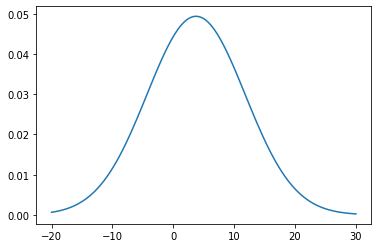

In [154]:
x=np.linspace(-20, 30, 100)
plt.plot(x, pi[0]*norm.pdf(x, mu[0], sigma[0])+pi[1]*norm.pdf(x, mu[1], sigma[1])+pi[2]*norm.pdf(x, mu[2], sigma[2]))
plt.show()


1.0


Anscheinend scheint es im Code noch einen Fehler zu geben, da die verscheidenen Gaußverteilungen nicht zu erkennen sind, diesen konnten wir allerdings nicht mehr finden.